In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Припустимо, у вас є дані в такій структурі
data = {
    'Param1': [True, True, True, False, False, False],
    'Param2': [3, 5, 7, 3, 5, 7],
    'Accuracy': [0.85, 0.87, 0.88, 0.82, 0.83, 0.84]
}
df = pd.DataFrame(data)


In [5]:
pivot_table = df.pivot_table(values='Accuracy', index='Param1', columns='Param2')
print(pivot_table)


Param2     3     5     7
Param1                  
False   0.82  0.83  0.84
True    0.85  0.87  0.88


In [11]:
df['Param1'] = df['Param1'].astype(int)  # Перетворення булевого значення на інтегер

# Залежна змінна
y = df['Accuracy']
# Незалежні змінні з включенням константи
X = sm.add_constant(df[['Param1', 'Param2']])

# Побудова моделі
model = sm.GLS(y, X).fit()
print(model.summary())


                            GLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.984
Model:                            GLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     95.10
Date:                Tue, 09 Jul 2024   Prob (F-statistic):            0.00193
Time:                        15:42:15   Log-Likelihood:                 27.119
No. Observations:                   6   AIC:                            -48.24
Df Residuals:                       3   BIC:                            -48.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7988      0.005    155.660      0.0

C:\Users\tkachenko\Anaconda3\envs\tf\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


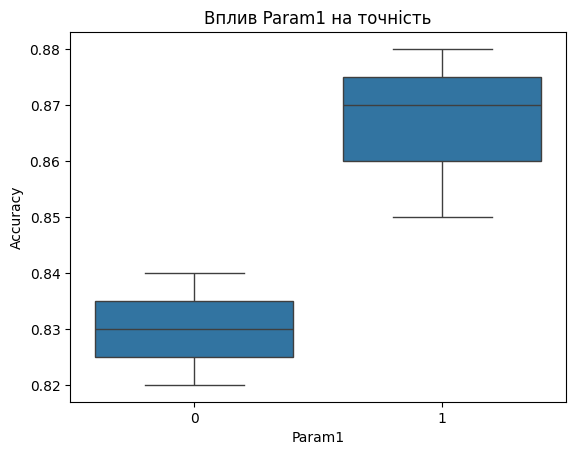

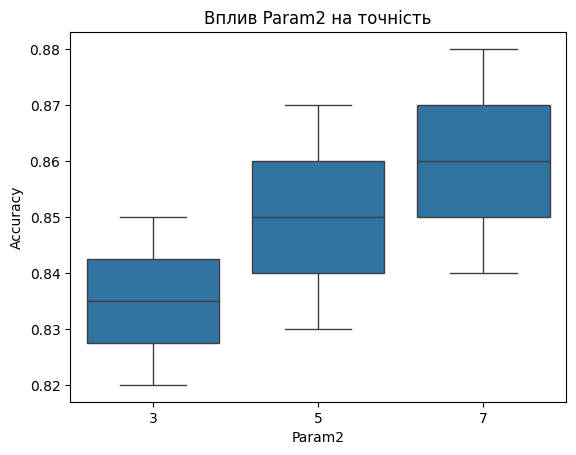

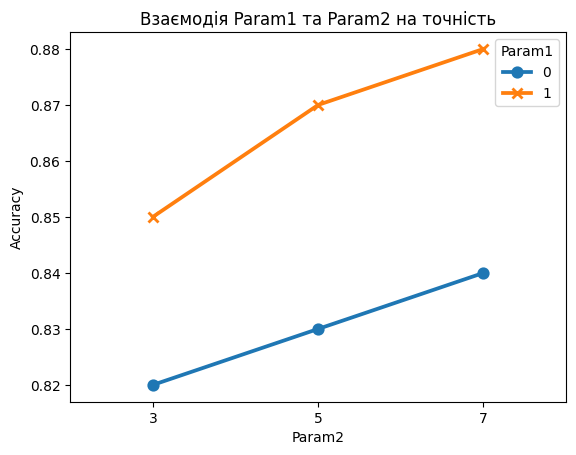

In [7]:
# Візуалізація впливу Param1
sns.boxplot(x='Param1', y='Accuracy', data=df)
plt.title('Вплив Param1 на точність')
plt.show()

# Візуалізація впливу Param2
sns.boxplot(x='Param2', y='Accuracy', data=df)
plt.title('Вплив Param2 на точність')
plt.show()

# Візуалізація взаємодії Param1 та Param2
sns.pointplot(x='Param2', y='Accuracy', hue='Param1', data=df, markers=['o', 'x'])
plt.title('Взаємодія Param1 та Param2 на точність')
plt.show()
